In [49]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
plt.rcParams["figure.figsize"] = (7,3)
plt.rcParams['axes.facecolor'] = 'white'

In [50]:
#remove first 5 responses
df = pd.read_csv('EXERCISE Head Worn Displays Quiz Student Analysis Report.csv')[5:]
df2 = pd.read_csv('EXERCISE Head Worn Displays 2 Quiz Student Analysis Report.csv')

In [51]:
#remove bad columns
df = df.drop([x for i, x in enumerate(df.columns) if i % 2 == 1], axis=1)
df = df.drop(['Unnamed: 0', 'Unnamed: 14', 'n correct', 'score'], axis=1)
df2 = df2.drop([x for i, x in enumerate(df2.columns) if i % 2 == 1], axis=1)
df2 = df2.drop([df2.columns[7], df2.columns[0], 'n correct', 'score'], axis=1)

In [52]:
#find nan, replace with ''
df[df.isna().any(axis=1)]
df.fillna('', inplace=True)
df2[df2.isna().any(axis=1)]
df2.fillna('', inplace=True)

In [53]:
#convert string to int answers
def string_to_int(x):
    if len(x) > 0 and x[0].isnumeric():
        return int(x[0])
    return x
df = df.applymap(string_to_int)
df2 = df2.applymap(string_to_int)

In [54]:
#split columns
eddf = df[df.columns[:6]]
fsdf = df[df.columns[6:]]
sc = df2[df2.columns[:6]]
coda = df2[df2.columns[6:]]

# Simple Mean detection, it was a lot better!

In [55]:
print("E Domain (With RA)")
for col in eddf.columns[:-1]:
    print(f"{col.split(':')[-1]} Mean: {eddf[col].mean()}")

print("Free Speech (Without RA)")
for col in fsdf.columns[:-1]:
    print(f"{col.split(':')[-1]} Mean: {fsdf[col].mean()}")
    
print("student center (Without RA)")
for col in eddf.columns[:-1]:
    print(f"{col.split(':')[-1]} Mean: {eddf[col].mean()}")

print("coda (with RA)")
for col in fsdf.columns[:-1]:
    print(f"{col.split(':')[-1]} Mean: {fsdf[col].mean()}")

E Domain (With RA)
 The interviewee made sufficient eye contact Mean: 5.545454545454546
 The interviewee gave specific and detailed answers Mean: 6.212121212121212
 The interviewee's answers were relevant and non-contradictory Mean: 5.803030303030303
 The interviewee was engaged in the conversation Mean: 6.03030303030303
 The interviewee had good pacing, with no awkward pauses Mean: 5.7727272727272725
Free Speech (Without RA)
 The interviewee made sufficient eye contact Mean: 4.2727272727272725
 The interviewee gave specific and detailed answers Mean: 4.954545454545454
 The interviewee's answers were relevant and non-contradictory Mean: 4.818181818181818
 The interviewee was engaged in the conversation Mean: 5.484848484848484
 The interviewee had good pacing, with no awkward pauses Mean: 4.257575757575758
student center (Without RA)
 The interviewee made sufficient eye contact Mean: 5.545454545454546
 The interviewee gave specific and detailed answers Mean: 6.212121212121212
 The inter

# More complex Summary Statistics

In [56]:
for i, col in enumerate(df.columns[:5]):
    print(df[[col, df.columns[i+6]]].describe())
    print('\n\n\n\n')

       8574369: Eminent Domain Video: The interviewee made sufficient eye contact  \
count                                          66.000000                            
mean                                            5.545455                            
std                                             1.069606                            
min                                             3.000000                            
25%                                             5.000000                            
50%                                             6.000000                            
75%                                             6.000000                            
max                                             7.000000                            

       8574705: Free Speech Video: The interviewee made sufficient eye contact  
count                                          66.000000                        
mean                                            4.272727                

In [57]:
for i, col in enumerate(df2.columns[:5]):
    print(df2[[col, df2.columns[i+6]]].describe())
    print('\n\n\n\n')

       8679193: Student CenterVideo: The interviewee made sufficient eye contact  \
count                                          62.000000                           
mean                                            5.419355                           
std                                             1.312592                           
min                                             2.000000                           
25%                                             5.000000                           
50%                                             6.000000                           
75%                                             6.000000                           
max                                             7.000000                           

       8679313: CODA Video: The interviewee made sufficient eye contact  
count                                          62.000000                 
mean                                            4.629032                 
std                  

<ipython-input-58-233904832c78>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Strongly Disagree: 1', '2', '3', 'Neutral: 4', '5', '6', 'Strongly Agree: 7'])


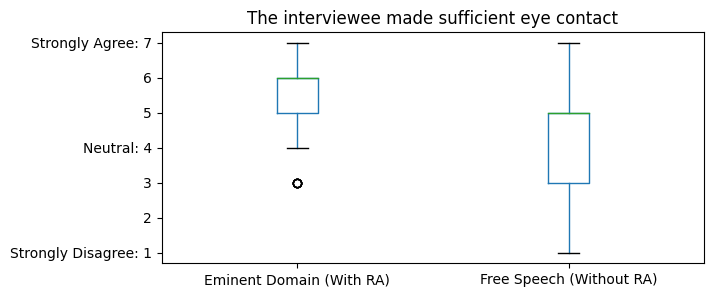

<ipython-input-58-233904832c78>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Strongly Disagree: 1', '2', '3', 'Neutral: 4', '5', '6', 'Strongly Agree: 7'])


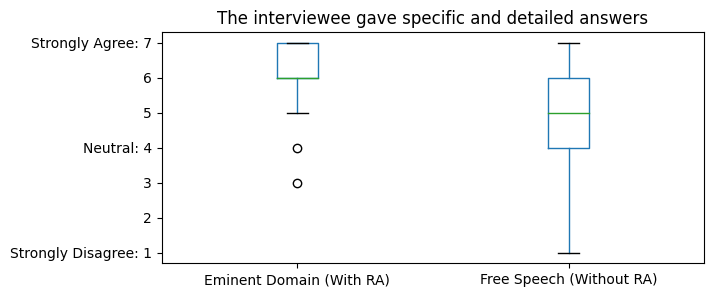

<ipython-input-58-233904832c78>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Strongly Disagree: 1', '2', '3', 'Neutral: 4', '5', '6', 'Strongly Agree: 7'])


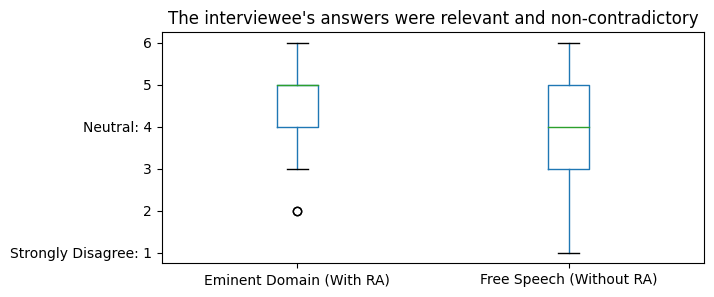

<ipython-input-58-233904832c78>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Strongly Disagree: 1', '2', '3', 'Neutral: 4', '5', '6', 'Strongly Agree: 7'])


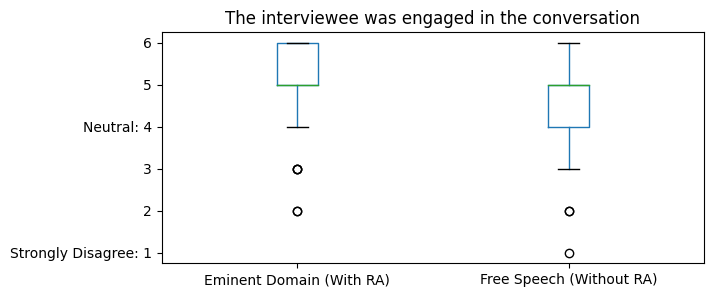

<ipython-input-58-233904832c78>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Strongly Disagree: 1', '2', '3', 'Neutral: 4', '5', '6', 'Strongly Agree: 7'])


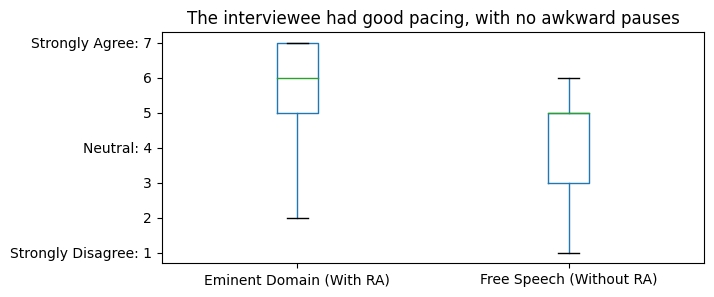

In [58]:
bplots = []
for i, col in enumerate(df.columns[:5]):
    fig, ax = plt.subplots()
    b = df.boxplot([col, df.columns[i+6]])
    ax.set_xticklabels(['Eminent Domain (With RA)','Free Speech (Without RA)'])
    ax.set_yticklabels(['', 'Strongly Disagree: 1', '2', '3', 'Neutral: 4', '5', '6', 'Strongly Agree: 7'])
    plt.title(col.split(': ')[-1])
    ax.grid(False)
    plt.savefig(col.split(': ')[-1] + '.png')
    plt.show()

In [60]:
for i, col in enumerate(df.columns[:5]):
    s, p = stats.ttest_ind(df[col], df[df.columns[i+6]])
    print(f"Question: {col.split(': ')[-1]} Statistic: {s} P Value: {p})")

Question: The interviewee made sufficient eye contact Statistic: 5.815755226069746 P Value: 4.434216389664779e-08)
Question: The interviewee gave specific and detailed answers Statistic: 7.014394918519988 P Value: 1.13654406852462e-10)
Question: The interviewee's answers were relevant and non-contradictory Statistic: 4.914834540193683 P Value: 2.6263943680774026e-06)
Question: The interviewee was engaged in the conversation Statistic: 3.22889184926616 P Value: 0.0015734824245797203)
Question: The interviewee had good pacing, with no awkward pauses Statistic: 6.540645591568797 P Value: 1.2794038252846018e-09)


/home/anishthite/miniconda3/envs/simgan-cgp/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


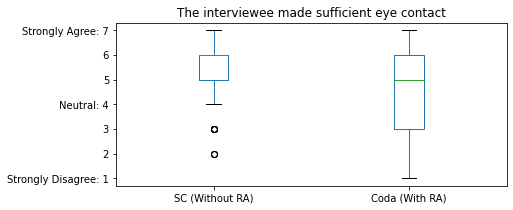

/home/anishthite/miniconda3/envs/simgan-cgp/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


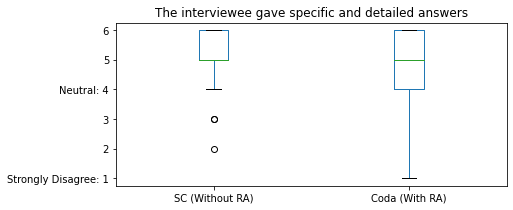

/home/anishthite/miniconda3/envs/simgan-cgp/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


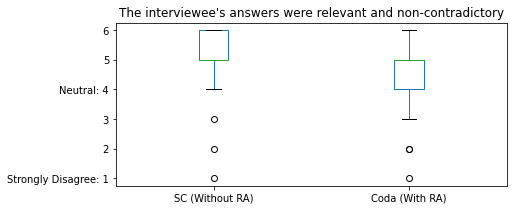

/home/anishthite/miniconda3/envs/simgan-cgp/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


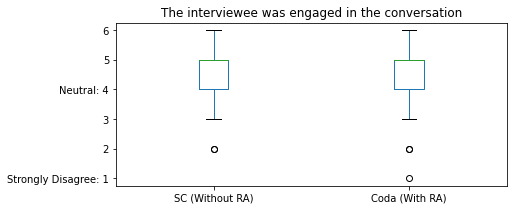

/home/anishthite/miniconda3/envs/simgan-cgp/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


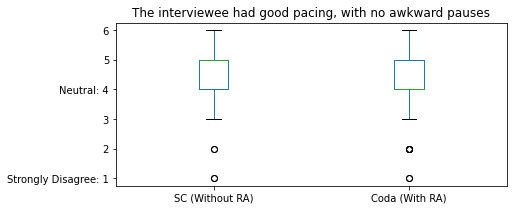

In [14]:
bplots = []
for i, col in enumerate(df2.columns[:5]):
    fig, ax = plt.subplots()
    b = df2.boxplot([col, df2.columns[i+6]])
    ax.set_xticklabels(['SC (Without RA)','Coda (With RA)'])
    ax.set_yticklabels(['', 'Strongly Disagree: 1', '2', '3', 'Neutral: 4', '5', '6', 'Strongly Agree: 7'])
    plt.title(col.split(': ')[-1])
    ax.grid(False)
    plt.savefig(col.split(': ')[-1] + 'counter.png')
    plt.show()

In [15]:
for i, col in enumerate(df2.columns[:5]):
    #print(col)
    s, p = stats.ttest_ind(df2[col], df2[df2.columns[i+6]])
    print(f"Question: {col.split(': ')[-1]} Statistic: {s} P Value: {p})")

Question: The interviewee made sufficient eye contact Statistic: 3.1142834924605833 P Value: 0.002298295547636236)
Question: The interviewee gave specific and detailed answers Statistic: 2.254496022296388 P Value: 0.0259487856498233)
Question: The interviewee's answers were relevant and non-contradictory Statistic: 2.209981848196382 P Value: 0.02897209976722018)
Question: The interviewee was engaged in the conversation Statistic: 1.226644378338168 P Value: 0.2223183731170703)
Question: The interviewee had good pacing, with no awkward pauses Statistic: 2.1816402407655118 P Value: 0.03105312084095277)


In [26]:
cols = list(df2.columns)
cols = cols[6:] + cols[:6] 
tdf = df2[cols]
tdf = tdf.set_axis(df.columns, axis=1)
tdf = pd.concat([df, tdf], axis=0, ignore_index=True)

<ipython-input-61-eab947a599c5>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Strongly Disagree: 1', '2', '3', 'Neutral: 4', '5', '6', 'Strongly Agree: 7'])


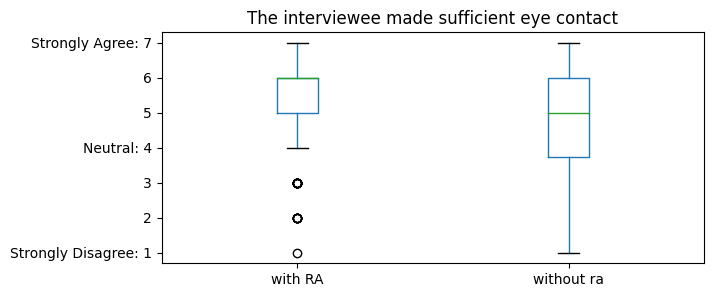

<ipython-input-61-eab947a599c5>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Strongly Disagree: 1', '2', '3', 'Neutral: 4', '5', '6', 'Strongly Agree: 7'])


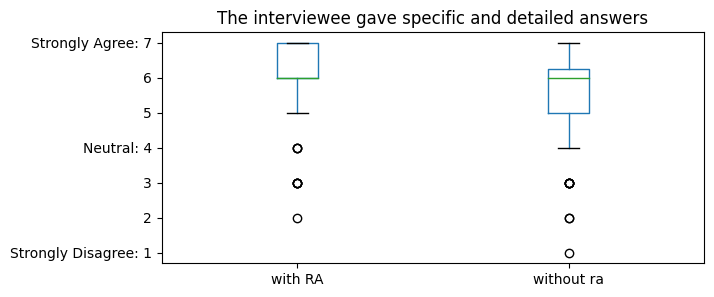

<ipython-input-61-eab947a599c5>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Strongly Disagree: 1', '2', '3', 'Neutral: 4', '5', '6', 'Strongly Agree: 7'])


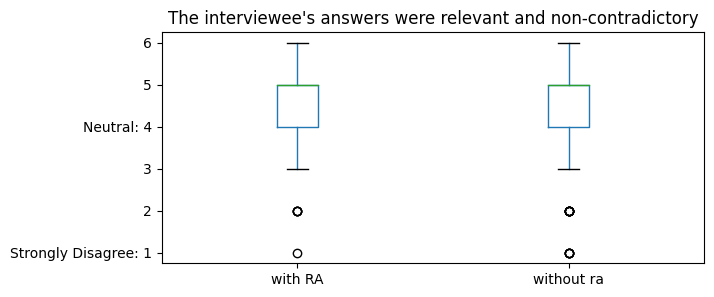

<ipython-input-61-eab947a599c5>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Strongly Disagree: 1', '2', '3', 'Neutral: 4', '5', '6', 'Strongly Agree: 7'])


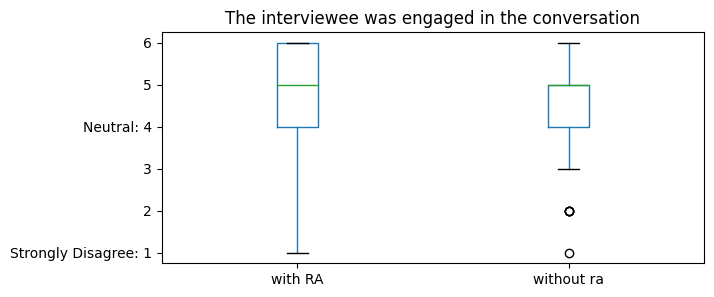

<ipython-input-61-eab947a599c5>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Strongly Disagree: 1', '2', '3', 'Neutral: 4', '5', '6', 'Strongly Agree: 7'])


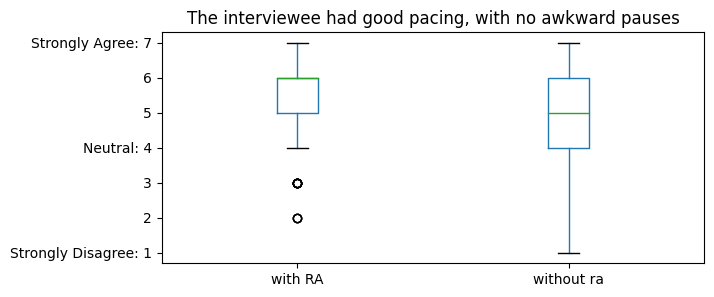

In [61]:
bplots = []
for i, col in enumerate(tdf.columns[:5]):
    fig, ax = plt.subplots()
    b = tdf.boxplot([col, tdf.columns[i+6]])
    ax.set_xticklabels(['with RA','without ra'])
    ax.set_yticklabels(['', 'Strongly Disagree: 1', '2', '3', 'Neutral: 4', '5', '6', 'Strongly Agree: 7'])
    plt.title(col.split(': ')[-1])
    ax.grid(False)
    plt.savefig(col.split(': ')[-1] + ' both.png')
    plt.show()

In [89]:
dfa = tdf[tdf.columns[:5]]
dfb = tdf[tdf.columns[6:-1]]
dfc = pd.DataFrame(np.concatenate((dfa.values, dfb.values), axis=0))
par = np.concatenate([np.arange(128), np.arange(128)])
dfc['participantid'] = par
dfc['independentvar'] = np.concatenate([np.zeros(128), np.ones(128)])
dfc.columns
for i in range(5):
    res = pg.rm_anova(data=dfc, dv = i,
                      within = 'independentvar', subject='participantid',
                      correction=True)
    print(res['p-unc'])
#     speh = pg.sphericity(data=dfc, dv = i, within='independentvar',
#                         subject='participantid', alpha=0.05)
#     print(speh)
for i, col in enumerate(tdf.columns[:5]):
    #print(col)
#    newdf = tdf[col]
#    print(newdf)
    #pg.rm_anova(data=tdf, dv = 
    s, p = stats.ttest_ind(tdf[col], tdf[tdf.columns[i+6]])
    print(f"Question: {col.split(': ')[-1]} Statistic: {s} P Value: {p})")

0    0.103302
Name: p-unc, dtype: float64
0    0.002374
Name: p-unc, dtype: float64
0    0.023051
Name: p-unc, dtype: float64
0    0.164982
Name: p-unc, dtype: float64
0    0.002098
Name: p-unc, dtype: float64
Question: The interviewee made sufficient eye contact Statistic: 1.5319430462373973 P Value: 0.12678101241024622)
Question: The interviewee gave specific and detailed answers Statistic: 3.041467178768526 P Value: 0.002600873097784768)
Question: The interviewee's answers were relevant and non-contradictory Statistic: 1.9742239351758457 P Value: 0.049439655549920504)
Question: The interviewee was engaged in the conversation Statistic: 1.35875624667366 P Value: 0.17542922044754386)
Question: The interviewee had good pacing, with no awkward pauses Statistic: 3.3384960865422317 P Value: 0.000968638547571667)


In [90]:
for i, col in enumerate(tdf.columns[:5]):
    print(tdf[[col, tdf.columns[i+6]]].describe())
    print('\n\n\n\n')

       8574369: Eminent Domain Video: The interviewee made sufficient eye contact  \
count                                         128.000000                            
mean                                            5.101562                            
std                                             1.373769                            
min                                             1.000000                            
25%                                             5.000000                            
50%                                             6.000000                            
75%                                             6.000000                            
max                                             7.000000                            

       8574705: Free Speech Video: The interviewee made sufficient eye contact  
count                                         128.000000                        
mean                                            4.828125                

In [92]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
tdf

<ipython-input-92-9bcea7f96a43>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,8574369: Eminent Domain Video: The interviewee made sufficient eye contact,8574371: Eminent Domain Video: The interviewee gave specific and detailed answers,8574373: Eminent Domain Video: The interviewee's answers were relevant and non-contradictory,8574375: Eminent Domain Video: The interviewee was engaged in the conversation,"8574381: Eminent Domain Video: The interviewee had good pacing, with no awkward pauses","8574383: Eminent Domain Video: Did you notice anything out of place, odd, or distracting in the session?",8574705: Free Speech Video: The interviewee made sufficient eye contact,8574707: Free Speech Video: The interviewee gave specific and detailed answers,8574713: Free Speech Video: The interviewee's answers were relevant and non-contradictory,8574715: Free Speech Video: The interviewee was engaged in the conversation,"8574717: Free Speech Video: The interviewee had good pacing, with no awkward pauses","8574719: Free Speech and Eminent Domain Videos: Did you notice anything out of place, odd, or distracting in either/both of the sessions?"
0,5,7,6,7,7,I could not figure out if the interviewee was speaking to one interviewer or multiple interviewers because their eye gaze was not concentrated at one point but rather kept going here and there.,6,6,5,4,3,"The interviewee seemed slightly less engaged in conversation for this video, and had more pauses in between the last video. It also felt like the interviewee was hesitant to speak on this topic, and the eye contact kept reflected that as well."
1,7,7,7,6,6,"When the interviewer was asking the last question, they interviewee reacted inpatiently to the interviewer's pause and the question.",5,6,5,6,3,The interviewee seems not sute and condident about his answer for the last question
2,6,6,6,7,5,The quality of the video and audio was not the best and I had trouble hearing what he was saying at some points in the video.,4,5,4,6,4,The background was very distracting because there was a lot of stuff behind him and he was shifting around and moving a lot in the second video.
3,6,5,6,7,7,Not very much. Sometimes the interviewee would spin at an angle in his chair but it was minor.,4,3,3,5,1,"In the Free Speech video the speaker sometimes made sharp gestures that seemed out of place and would state content slowly and a bit confusingly. They also didn't seem to answer the final question completely and had awkward inserts like ""so yeah"" and ""um""."
4,6,6,5,6,6,No,2,4,3,5,2,Yes
5,5,6,6,5,6,"The interviewee kept turning his chair away from the interviewer during the interview, which felt distracting.",3,3,5,6,2,"The interviewee kept breaking eye contact a lot in the free speech video, and also kept swiveling the chair a little bit."
6,6,7,6,7,7,"The interviewee gesticulated too much with his left arm, which was distracting.",5,6,4,5,5,"The interviewee wiggled with his chair while waiting for the interviewer to ask the next question, which was distracting."
7,7,7,7,7,7,Nothing specific that I could notice.,3,5,5,5,3,"For Free Speech Video, the interviewee seems to be distracted by something outside the scene, and he seems to hold back from laughing multiple times during the interview.\n\nFor Eminent Domain Video, as I mentioned above, there is nothing specific that I could notice that is odd or out of place."
8,6,6,7,6,7,No,6,6,7,6,6,No\n\nExcept that the quality of the interviewee's voice is not great. Maybe a closer (attached microphone would help).
9,5,6,6,6,6,"I didn't notice anything out of the ordinary in the session - it seemed to me like a standard interview. I could focus on the interviewee's answers, as there wasn't anything distracting that occurred.",5,5,5,6,5,"There was nothing out of place that I took note of in either session, as both interviews followed a standard interview format. The interviewee was rocking in his chair while answering some of the questions in the Free Speech Video, which was a bit distracting, but not overwhelming in any sort of way."


In [91]:
tdf

,8574369: Eminent Domain Video: The interviewee made sufficient eye contact,8574371: Eminent Domain Video: The interviewee gave specific and detailed answers,8574373: Eminent Domain Video: The interviewee's answers were relevant and non-contradictory,8574375: Eminent Domain Video: The interviewee was engaged in the conversation,"8574381: Eminent Domain Video: The interviewee had good pacing, with no awkward pauses","8574383: Eminent Domain Video: Did you notice anything out of place, odd, or distracting in the session?",8574705: Free Speech Video: The interviewee made sufficient eye contact,8574707: Free Speech Video: The interviewee gave specific and detailed answers,8574713: Free Speech Video: The interviewee's answers were relevant and non-contradictory,8574715: Free Speech Video: The interviewee was engaged in the conversation,"8574717: Free Speech Video: The interviewee had good pacing, with no awkward pauses","8574719: Free Speech and Eminent Domain Videos: Did you notice anything out of place, odd, or distracting in either/both of the sessions?"
0,5,7,6,7,7,I could not figure out if the interviewee was ...,6,6,5,4,3,The interviewee seemed slightly less engaged i...
1,7,7,7,6,6,When the interviewer was asking the last quest...,5,6,5,6,3,The interviewee seems not sute and condident a...
2,6,6,6,7,5,The quality of the video and audio was not the...,4,5,4,6,4,The background was very distracting because th...
3,6,5,6,7,7,Not very much. Sometimes the interviewee would...,4,3,3,5,1,In the Free Speech video the speaker sometimes...
4,6,6,5,6,6,No,2,4,3,5,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
123,6,7,7,6,5,,6,7,7,6,6,
124,5,6,4,6,5,"No, I did not notice anything out of place, od...",6,6,5,6,5,"No, I did not notice anything out of place, od..."
125,6,7,6,7,7,nothing was distracting or out of place in eit...,7,7,7,7,6,No I did not notice anything odd or distracting
126,6,6,6,6,5,"No, seemed like a typical interview - nothing ...",6,7,6,6,6,"No, seemed like a typical interview - nothing ..."
